In [ ]:
# "Unlocking the Binge-Watch Blueprint: Netflix Revenue, Subscribers, and IMDB Insights".

In [ ]:
# By Hardik Mudgal

In [22]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


In [23]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
sns.set_palette(sns.color_palette("muted"))


df = pd.read_csv("../Netflix data analysis/data/netflix_titles.csv",index_col='title')
df.drop(['duration'],axis=1)


,show_id,type,director,cast,country,date_added,release_year,rating,listed_in,description
title,,,,,,,,,,
Norm of the North: King Sized Adventure,81145628,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
Jandino: Whatever it Takes,80117401,Movie,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
Transformers Prime,70234439,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,Kids' TV,"With the help of three human allies, the Autob..."
Transformers: Robots in Disguise,80058654,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,Kids' TV,When a prison ship crash unleashes hundreds of...
#realityhigh,80125979,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...
Red vs. Blue,80000063,TV Show,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
Maron,70286564,TV Show,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
Little Baby Bum: Nursery Rhyme Friends,80116008,Movie,NaN,NaN,NaN,NaN,2016,NaN,Movies,Nursery rhymes and original music for children...


In [24]:
## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


df.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
title,,,,,,,,,,,,,
Norm of the North: King Sized Adventure,81145628,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0
Jandino: Whatever it Takes,80117401,Movie,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0
Transformers Prime,70234439,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0
Transformers: Robots in Disguise,80058654,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0
#realityhigh,80125979,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0


In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [26]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()

vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

vc3 = df[col].value_counts().reset_index()
vc3 = vc3.rename(columns = {col : "count", "index" : col})
vc3['percent'] = vc3['count'].apply(lambda x : 100*x/sum(vc3['count']))
vc3 = vc3.sort_values(col)

print(vc3)

    year_added  count    percent
11      2008.0      2   0.032139
10      2009.0      2   0.032139
12      2010.0      1   0.016069
7       2011.0     13   0.208902
9       2012.0      7   0.112486
8       2013.0     12   0.192833
6       2014.0     25   0.401735
5       2015.0     90   1.446248
3       2016.0    456   7.327655
2       2017.0   1300  20.890246
1       2018.0   1782  28.635706
0       2019.0   2349  37.747067
4       2020.0    184   2.956773


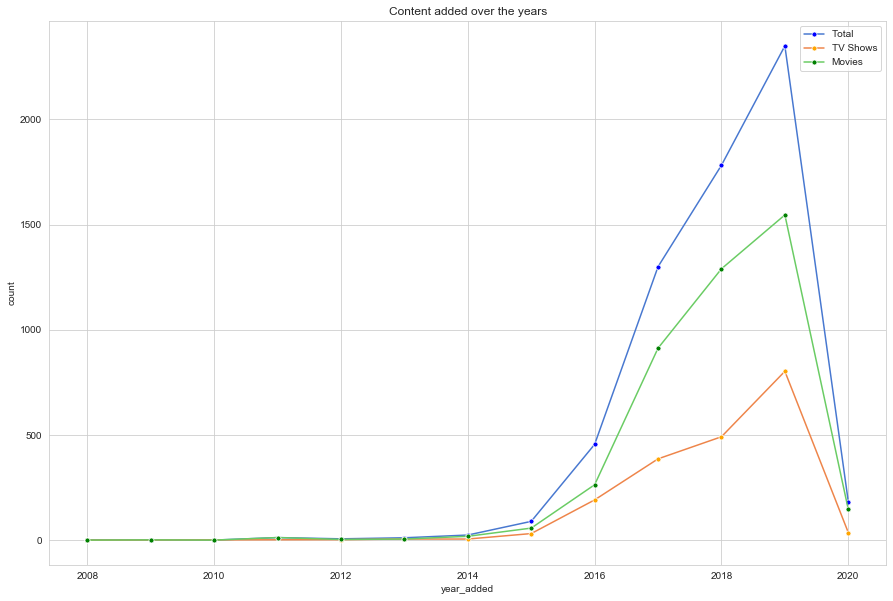

In [27]:
#plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
plt.title("Content added over the years")
ax=sns.lineplot(x="year_added",y="count",data=vc3,label="Total",marker='o', markerfacecolor='blue', markersize=5)
ax=sns.lineplot(x="year_added",y="count",data=vc1,label="TV Shows",marker='o', markerfacecolor='orange', markersize=5)
ax=sns.lineplot(x="year_added",y="count",data=vc2,label="Movies",marker='o', markerfacecolor='green', markersize=5)
plt.subplot(ax)
plt.show()

In [28]:
#finding the 10 most common genres in movies
col = "listed_in"
d1=df[(df['type']=="Movie")]
categories = ", ".join(d1['listed_in']).split(", ")
counter_list = Counter(categories).most_common(10)
print(counter_list)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]


[('International Movies', 1927), ('Dramas', 1623), ('Comedies', 1113), ('Documentaries', 668), ('Action & Adventure', 597), ('Independent Movies', 552), ('Thrillers', 392), ('Children & Family Movies', 378), ('Romantic Movies', 376), ('Stand-Up Comedy', 281)]


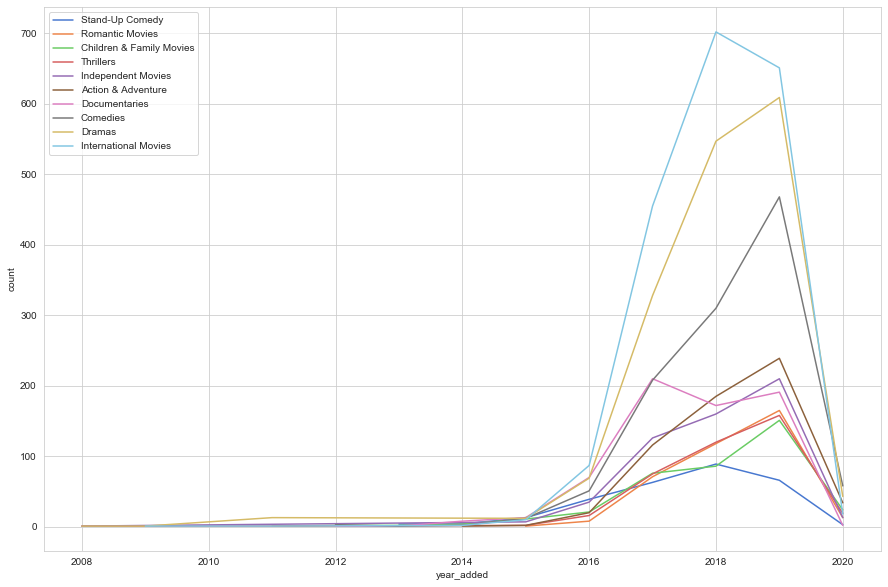

In [29]:
#code for the above plot
x=pd.DataFrame()

for i in labels:
    d1 = df[(df["listed_in"].str.contains(i)) & (df["type"]=="Movie")]

    col = "year_added"

    vc1 = d1[col].value_counts().reset_index()

    vc1 = vc1.rename(columns = {col : "count", "index" : col})
    vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
    vc1 = vc1.sort_values(col)
    
    ax=sns.lineplot(x="year_added",y="count",data=vc1,label=i,marker='', markerfacecolor='black', markersize=5)
    plt.subplot(ax)


In [30]:
df1 = df[df['country'].notna()]
c=pd.concat([pd.Series(row['year_added'], row['country'].split(','))              
                    for _, row in df1.iterrows()]).reset_index()
c = c.rename(columns = {"index" : "country", 0 : "year"})


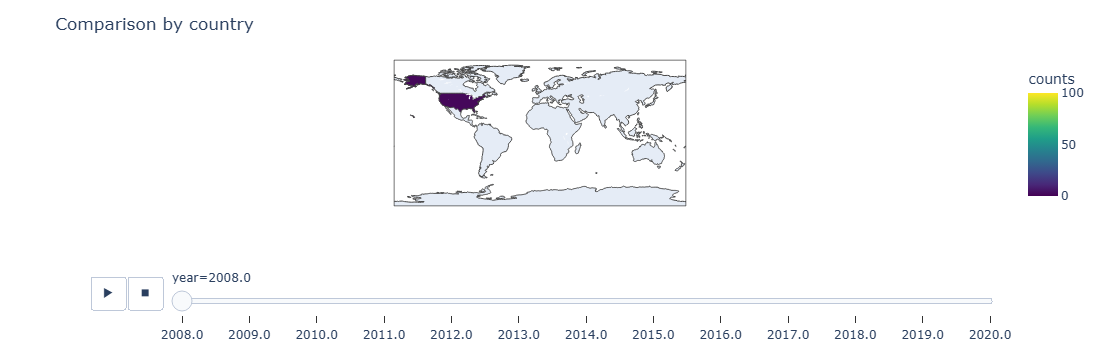

In [31]:
import plotly.express as px
year_country2 = c.groupby('country')['year'].value_counts().reset_index(name='counts')
#print(year_country2)
year_country2= year_country2.sort_values('year')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year',
                    range_color=[0,100],
                    color_continuous_scale=px.colors.sequential.Viridis
                   )

fig.update_layout(title='Comparison by country')
fig.show()


In [32]:
df2 = df[df['country'].notna()]

col='country'
#categories = ", ".join(top[col]).split(", ")
t_categories = ", ".join(df2[col]).split(", ")

counter_list = Counter(t_categories).most_common(10)
print(counter_list)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
top_countries=pd.DataFrame()
#top_countries['genre']=pd.Series(labels)
#top_countries['count']=pd.Series(values)
#top_countries

for i in labels: 
    m=len(df[(df["country"].str.contains(i)) & (df["type"]=="Movie")])
    tv=len(df[(df["country"].str.contains(i)) & (df["type"]=="TV Show")])
    top_countries=top_countries.append(pd.Series([i,m+tv,m,tv]),ignore_index=True)
print(top_countries)

[('United States', 2609), ('India', 838), ('United Kingdom', 601), ('Canada', 318), ('France', 271), ('Japan', 231), ('Spain', 178), ('South Korea', 162), ('Germany', 151), ('Mexico', 129)]
                0       1       2      3
0          Mexico   129.0    84.0   45.0
1         Germany   156.0   129.0   27.0
2     South Korea   162.0    46.0  116.0
3           Spain   178.0   133.0   45.0
4           Japan   231.0    75.0  156.0
5          France   271.0   201.0   70.0
6          Canada   318.0   211.0  107.0
7  United Kingdom   602.0   379.0  223.0
8           India   838.0   783.0   55.0
9   United States  2610.0  1924.0  686.0


<Figure size 720x720 with 0 Axes>

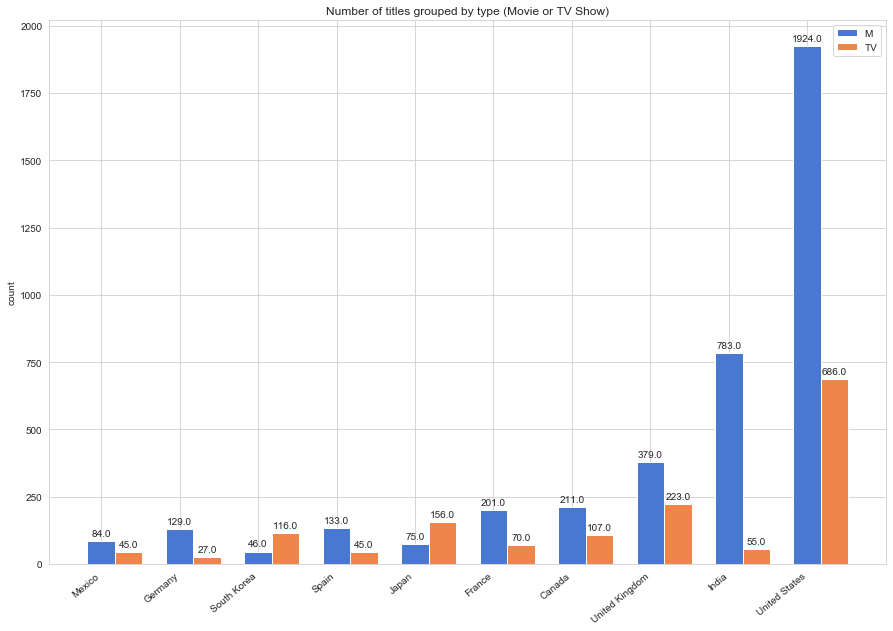

In [33]:


from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(10,10))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, top_countries[2], width, label='M',align='edge')
rects2 = ax.bar(x + width/2, top_countries[3], width, label='TV',align='edge')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Number of titles grouped by type (Movie or TV Show)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=40, ha="right")

#ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

#fig.tight_layout()

plt.show()

# Revenue and subscriber count from different countries

In [34]:

pop = pd.read_csv("../Netflix data analysis/data/Netflix Subscribers.csv")


In [35]:
pop.drop(columns=['Unnamed: 5','Source', 'Unnamed: 7','Average Monthly Revenue per Paying Membership'],inplace=True)
pop['# of Subscribers']=pop['# of Subscribers'].str.replace(',', '').astype(int)
cols=pop.columns.drop(['Country ', '# of Subscribers'])
for c in cols:
    pop[c]=pop[c].str.replace('$', '')
    pop[c]=pop[c].str.replace(',', '').astype(float)


In [36]:
pop.head(10)

,Country,# of Subscribers,Total Monthly Revenue from Paid Memberships,Total Yearly Revenue from Paid Memberships (2018)
0,United States,58486000,6.667404e+08,7.646647e+09
1,Australia,11262000,1.062007e+08,1.274408e+09
2,United Kingdom,9780000,9.222540e+07,1.106705e+09
3,Brazil,8500000,8.015500e+07,9.618600e+08
4,Canada,6300000,5.940900e+07,7.129080e+08
5,Germany,5100000,4.809300e+07,5.771160e+08
6,France,5000000,4.715000e+07,5.658000e+08
7,Spain,4000000,3.772000e+07,4.526400e+08
8,Japan,3274276,3.087642e+07,3.705171e+08
9,Netherlands,2940000,2.772420e+07,3.326904e+08


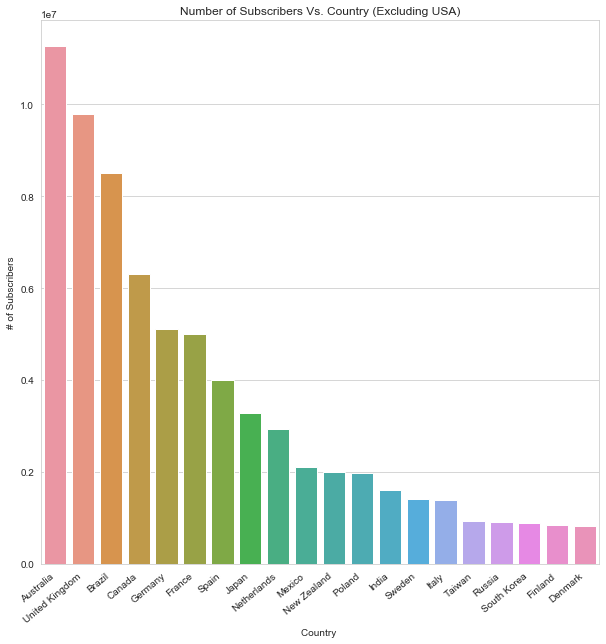

In [37]:
plt.figure(figsize=(10,10))
plt.title("Number of Subscribers Vs. Country (Excluding USA)")
plt.xlabel("Country")
plt.ylabel("Number of subcribers")
ax=sns.barplot(x="Country ",y="# of Subscribers",data=pop[1:21])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

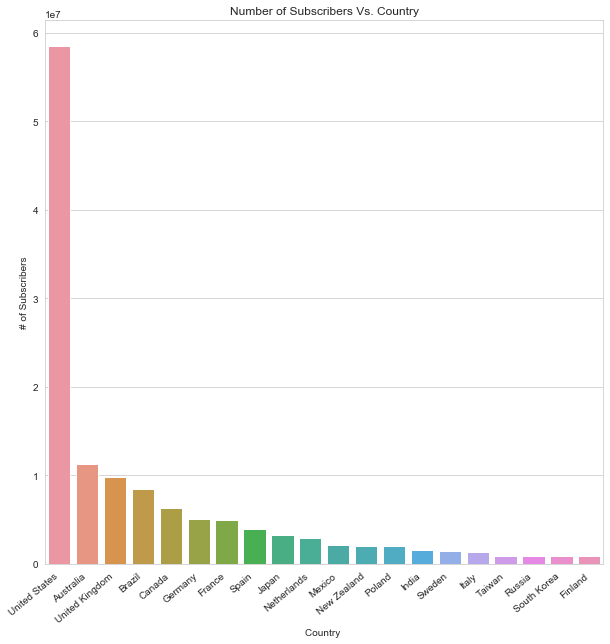

In [38]:
plt.figure(figsize=(10,10))
plt.title("Number of Subscribers Vs. Country")
plt.xlabel("Country")
plt.ylabel("Number of subcribers")
ax=sns.barplot(x="Country ",y="# of Subscribers",data=pop[0:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

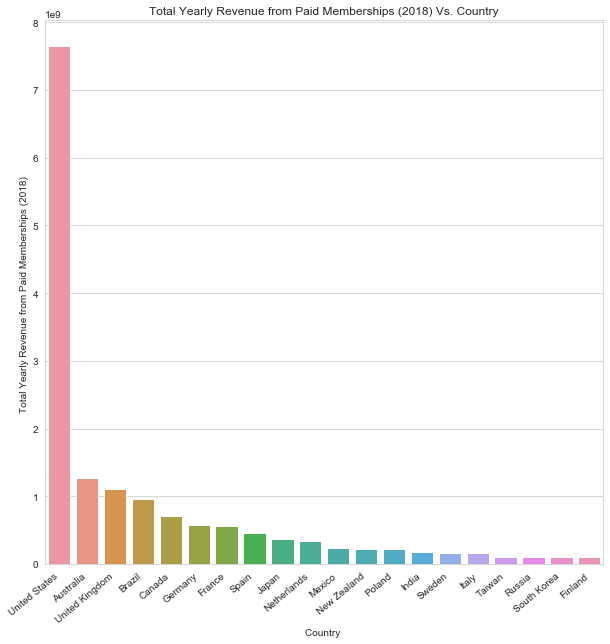

In [39]:
plt.figure(figsize=(10,10))
plt.title("Total Yearly Revenue from Paid Memberships (2018) Vs. Country")
plt.xlabel("Country")
plt.ylabel("Total Yearly Revenue from Paid Memberships (2018)")
ax=sns.barplot(x="Country ",y="Total Yearly Revenue from Paid Memberships (2018) ",data=pop[0:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

## IMDB DATA

In [40]:
imdb_titles=pd.read_csv('../Netflix data analysis/data/IMDb movies.csv',)
imdb_ratings=pd.read_csv('../Netflix data analysis/data/IMDb ratings.csv',usecols=['weighted_average_vote'])
ratings = pd.DataFrame({'title':imdb_titles.title,
                        'Rating': imdb_ratings.weighted_average_vote}
                    )
ratings.drop_duplicates(subset=['title','Rating'], inplace=True)
ratings.head()

ratings=ratings.set_index("title")

In [41]:
df1=df.join(ratings,on=["title"])
df1 = df1[df1['country'].notna()]
df1 = df1[df1['Rating'].notna()]
#df1=df1[(df1["type"]== "Movie")]

In [42]:
df1=df1.sort_values(by='Rating', ascending=False)



number=int(0.1*len(df1))
top=df1[0:number*2] #top 20% of the movies with best ratings


In [43]:
categories = ", ".join(top['country']).split(", ")
counter_list = Counter(categories).most_common(20)
#print(counter_list)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
top_countries=pd.DataFrame(columns=['country','count'])
top_countries['country']=pd.Series(labels)
top_countries['count']=pd.Series(values)
#top_countries

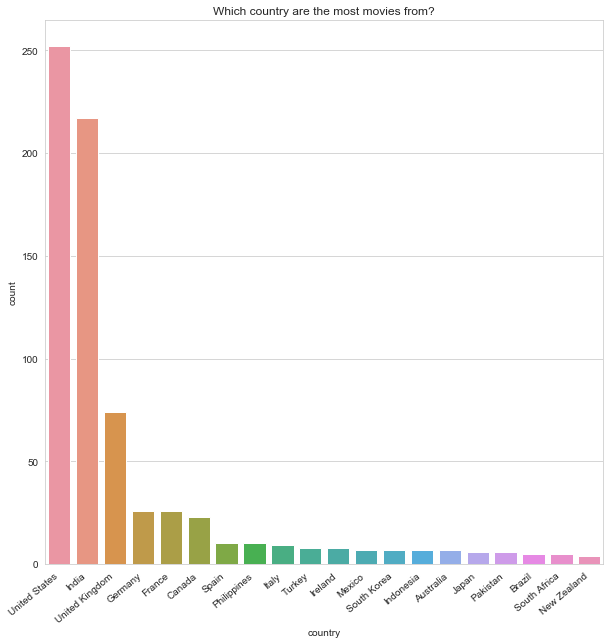

In [44]:
plt.figure(figsize=(10,10))
plt.title("Which country are the most movies from?")
plt.xlabel("Country")
plt.ylabel("Number of movies")
ax=sns.barplot(y="count",x="country",data=top_countries.sort_values(by='count',ascending=False)) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

How many of the countries with highest number of subscribers also have most ocntent on netflix?

In [45]:
x=set(top_countries['country']) #countries with most content
y=set(pop[0:20]['Country ']) #countries with top rated movies
z=x.intersection(y)

In [46]:
len(z)

14

In [47]:
z

{'Australia',
 'Brazil',
 'Canada',
 'France',
 'Germany',
 'India',
 'Italy',
 'Japan',
 'Mexico',
 'New Zealand',
 'South Korea',
 'Spain',
 'United Kingdom',
 'United States'}